In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [398]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [399]:
data = pd.read_csv("RealEstate.csv")

In [400]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [401]:
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

## data.describe() => Dataframe sutunlara ilişkin istatistiklerin özetini hesaplar

In [402]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## data.info() => DataFrame hakkında bilgi verir.

In [403]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


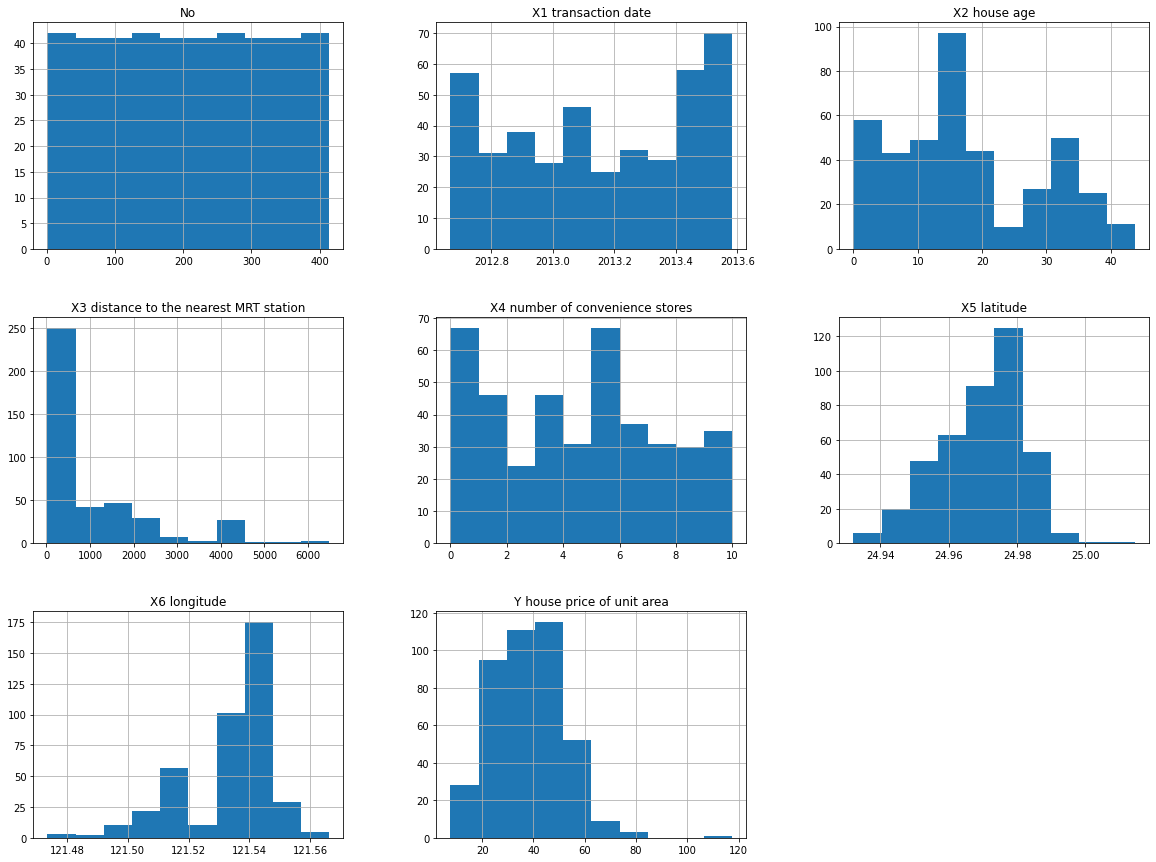

In [404]:
data.hist(bins = 10 , figsize = (20,15))
plt.show()

In [405]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [406]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [407]:
X = pd.DataFrame(data = X, index = range(len(X)), columns = ['No', "X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station", "X4 number of convenience stores", "X5 latitude", "X6 longitude"])

In [408]:
X.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,-1.727872,-0.823683,1.255628,-0.792495,2.007407,1.125430,0.448762
1,-1.719505,-0.823683,0.157086,-0.616612,1.667503,0.912444,0.401139
2,-1.711137,1.541151,-0.387791,-0.414015,0.307885,1.486860,0.688183
3,-1.702770,1.246435,-0.387791,-0.414015,0.307885,1.486860,0.688183
4,-1.694402,-1.121951,-1.117223,-0.549997,0.307885,0.834188,0.592937


In [409]:
Y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

In [410]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state=0)

In [411]:
from sklearn.linear_model import LinearRegression

In [412]:
linear_regression = LinearRegression()

In [413]:
linear_regression.fit(X_train, Y_train)

LinearRegression()

In [414]:
predict = linear_regression.predict(X_test)

In [415]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [416]:
MAE = mean_absolute_error(Y_test, predict)
MSE = mean_squared_error(Y_test, predict)
RMSE = np.sqrt(MSE)
d = {
    'MAE' : MAE,
    'MSE' : MSE,
    'RMSE': RMSE
}

In [417]:
d

{'MAE': 6.179551342706577, 'MSE': 71.48724421359893, 'RMSE': 8.455012963538195}

In [418]:
X.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,-1.727872,-0.823683,1.255628,-0.792495,2.007407,1.125430,0.448762
1,-1.719505,-0.823683,0.157086,-0.616612,1.667503,0.912444,0.401139
2,-1.711137,1.541151,-0.387791,-0.414015,0.307885,1.486860,0.688183
3,-1.702770,1.246435,-0.387791,-0.414015,0.307885,1.486860,0.688183
4,-1.694402,-1.121951,-1.117223,-0.549997,0.307885,0.834188,0.592937


In [419]:
Y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

In [420]:
model = linear_regression.fit(X_train, Y_train)

In [421]:
r_sq = model.score(X, Y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.5808920706093421
intercept: 38.407663889811936
slope: [-0.7931471   1.34652481 -2.97391997 -5.79757793  3.00416939  3.07315546
 -0.13444072]


In [422]:
linear_predict = linear_regression.predict(X_test)
print('predicted response:', linear_predict, sep='\n')

predicted response:
[39.99886763 12.83227704 42.4059162  11.59672886 42.52167732 39.27064126
 41.16725179 35.99470586 50.91737155 46.01244806 45.29604741 41.78556682
 39.1062214  40.36182498 46.70909182 39.62342462 39.96016695 42.28746374
 42.46991297 42.96238387 49.15052819 32.33724096 39.69345429 47.23933238
 47.13893937 43.16706903 46.51055897 26.40474588 47.59452704 20.94041219
 43.71561968 35.18423904 44.31937099 40.43752715 43.77278152 31.37647969
 47.38559215 40.63087471 53.83270709  6.99677056 51.53668335 34.82170411
 33.93550496 48.84995648 14.4214872  43.66234213 42.8701067  11.64652794
 35.21012498 47.6366663  52.45301923 40.65788261 49.52968078 24.93347286
 31.2516367  34.22392292 48.52377002 41.62288722 43.54753312 33.1622719
 44.29305319 44.90901194 40.56799305 47.99999548 37.73738892 30.35838864
 10.60422347 36.41775789 48.10269542 41.12888774 32.12997706 48.16083179
 45.14331722 30.04839551 41.94262051 36.18796416 32.77853506 13.15257562
 47.07216521 46.17527528 48.6908

In [423]:
y_pred = model.intercept_ + np.sum(model.coef_ * X, axis=1)
print('predicted response:', y_pred, sep='\n')

predicted response:
0      48.958305
1      49.529681
2      50.795360
3      50.391880
4      48.160832
         ...    
409    12.876745
410    48.725376
411    45.875196
412    43.639837
413    52.453019
Length: 414, dtype: float64


In [424]:
input_data1 = (5, 2012.833, 5.0, 390.56840, 5, 24.97937, 121.54245)

#Changing Input Data As Numpy Array
input_data_array = np.asarray(input_data1)

# Reshape the data as we are predicting for only one instance
input_data_reshape = input_data_array.reshape(1,-1)

# Standardize the data
std_data = sc.transform(input_data_reshape)


In [425]:
linear_regression.predict(std_data)

array([48.16083179])